# EDA

In [34]:
# jupyter lab에서 자동완성이 않될때 사용하는 코드
%config Completer.use_jedi = False

In [95]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [78]:
LEFT_KNEE_PATH = './data/left_knee/'

In [79]:
left_knee_data_lst = os.listdir(LEFT_KNEE_PATH)

### count

In [80]:
left_knee_lst, left_knee_mask_lst = [], []
for data in left_knee_data_lst:
    if 'mask' in data:
        left_knee_mask_lst.append(data)
    else:
        left_knee_lst.append(data)

left_knee_lst.sort()
left_knee_mask_lst.sort()
        
print(len(left_knee_lst), len(left_knee_mask_lst))

315 315


### size Check

In [104]:
n = len(left_knee_lst)
data = []
for i in tqdm(range(n)):
    img = cv2.imread(path + left_knee_lst[i])
    c, r, _ = img.shape
    data.append([c, r])

df = pd.DataFrame(data, columns=['Col', 'Row'])
df.shape

100%|██████████| 315/315 [00:00<00:00, 457.24it/s]


(315, 2)

In [111]:
print(df['Col'].mean(), df['Row'].mean())
print(df['Col'].max(), df['Row'].max())
print(df['Col'].min(), df['Row'].min())

220.96825396825398 241.4031746031746
370 370
140 164


In [115]:
(df['Row'] - df['Col']).max()

73

<AxesSubplot:>

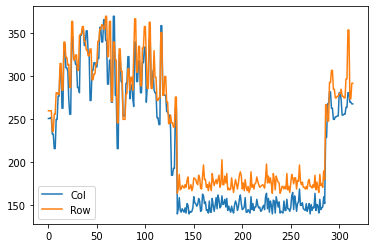

In [112]:
df.plot.line()

In [120]:
df.iloc[310]

Col    281
Row    354
Name: 310, dtype: int64

In [121]:
def show_image(idx):
    img_path = LEFT_KNEE_PATH + left_knee_lst[idx]

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.subplot(121)
    plt.title('cv2.IMREAD_COLOR')
    plt.imshow(img)

    plt.subplot(122)
    plt.title('cv2.IMREAD_GRAYSCALE')
    plt.imshow(img_gray)

    plt.show()

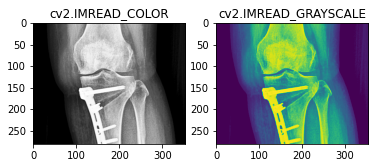

In [122]:
show_image(310)

### cv2 흑뱃 or 컬러 ?!

In [82]:
idx = 0
img_path = LEFT_KNEE_PATH + left_knee_lst[idx]

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

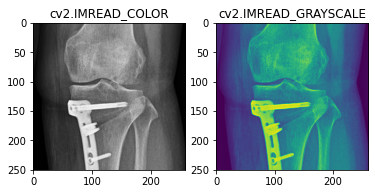

((251, 260, 3), (251, 260))

In [83]:
plt.subplot(121)
plt.title('cv2.IMREAD_COLOR')
plt.imshow(img)

plt.subplot(122)
plt.title('cv2.IMREAD_GRAYSCALE')
plt.imshow(img_gray)

plt.show()

img.shape, img_gray.shape

### 이미지와 마스크 같이 보기

In [84]:
idx = 0
img_path = LEFT_KNEE_PATH + left_knee_lst[idx]
mask_path = LEFT_KNEE_PATH + left_knee_mask_lst[idx]

print(img_path, mask_path)

./data/left_knee/104.png ./data/left_knee/1041_mask.png


In [85]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
mask = cv2.imread(mask_path, cv2.IMREAD_COLOR)

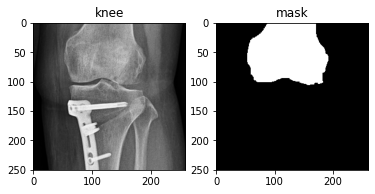

In [86]:
plt.subplot(121)
plt.title('knee')
plt.imshow(img)

plt.subplot(122)
plt.title('mask')
plt.imshow(mask)

plt.show()

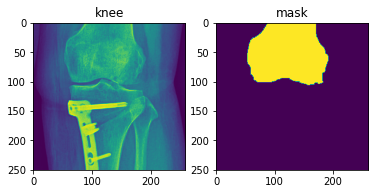

In [87]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.subplot(121)
plt.title('knee')
plt.imshow(img)

plt.subplot(122)
plt.title('mask')
plt.imshow(mask)

plt.show()